In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import KFold 
import seaborn as sns

1. Please implement a simple linear regression model using the closed-form solution (normal equation) and
stochastic gradient descent to train the model on this dataset for predicting the house price (in millions).
Split the data into training, validation, and test. Report the mean squared error (MSE) on the test data.
Draw the training and validation loss curves. You need to write down every step in your experiment

***Approch***

Our linear model is $$y(w,X) = w_0 + w_1X_1 + .. + w_mX_m$$

For this problem we employ two approaches to fit this model as suggested in the problem statement
1. We fit the model using a closed form solution (normal equation) of the form $$w=(X^TX)^{-1}X^Ty$$, where $w$ represents the weight vector (coefficients in the linear model), $X$ is the the feature matrix (input data) and $y$ is the label vector (target variables that we are trying to predict).
2. In the second approach we fit the linear model by trying to minimize the cost function via gradient descent. We utilize stochastic gradient descent. Our cost function is the mean squared error of the form $$\frac{1}{m}\sum_{i=1}^{m}(y(w,x^{(i)}) - y^{(i)})^2$$ where $m$ is the number of samples.
Our stochastic gradient is obtained by calculating the 1st derivative of the cost function for a randomly chosen sample and is of the form $$\nabla^{(i)} = 2x^{(i)T}(x^{(i)}w - y^{(i)})$$ where $x^{(i)}$ is the randomly chosen sample.
Once we obtain the gradient, we update the weights using $$w = w - \eta.\nabla^{(i)}$$ where $\eta$ is the learning rate.

***Data preparation steps***
1. Once we obtain the data, for our closed form approach we split it into a training and a test set. 
2. For the gradient descent approach, we split the data into a training, validation and test sets.
3. Since linear regression can be sensitive to differing scales in data, we standardize the input columns by subtracting mean and dividing by standard deviation.
3. We also stack a column of 1's to the input data to account for the bias term $w_0$

***Model fitting and prediction***
1. For approach 1, model fitting is simply solving the normal equation for the entire training set. We then predict the test labels using the test set and we calculate error using the mean squared error formula outlined above.
2. For approach 2, we run multiple iterations(epochs) and in each iteration we process the entire training set. For each such processing step, we pick a random (stochastic) sample from the training set, calculate the gradient and update the weights as outlined above. 
3. For each iteration we also calculate the overall training MSE and validation MSE. Finally we plot the training and validation losses, make predictions on the test set and calculate the test MSE as well.
4. We have chosen 500 iterations as the total number of epochs for this experiment, but improvements can be made by choosing a higher epoch count and adding a suitable stopping criterion when the validation loss stops decreasing.

In [2]:
# Load the California Housing dataset
housing = fetch_california_housing()
x = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.DataFrame(housing.target, columns=['PRICE'])
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
# train test split
num_data = x.shape[0]
num_features = x.shape[1]
print(num_data,num_features)

shuffled = np.random.permutation(num_data)

# calculate num of test samples
test_set = int(num_data * 0.2)

# split indices into test and train
test_indices = shuffled[:test_set]
train_indices = shuffled[test_set:]

# split the data
x_train_pre = x.iloc[train_indices]
x_test = x.iloc[test_indices]
y_train = y.iloc[train_indices]
y_test = y.iloc[test_indices]

20640 8


In [4]:
# train valid split
num_data = x_train_pre.shape[0]
num_features = x_train_pre.shape[1]
print(num_data,num_features)

# shuffling data
shuffled = np.random.permutation(num_data)

# calculate num of test samples
test_set = int(num_data * 0.2)

# split indices into test and train
test_indices = shuffled[:test_set]
train_indices = shuffled[test_set:]

# split the data
x_train = x_train_pre.iloc[train_indices]
x_valid = x_train_pre.iloc[test_indices]
y_train = y.iloc[train_indices]
y_valid = y.iloc[test_indices]

16512 8


In [5]:
# compute normal equation: w = (x^T x)^(-1) x^T y
xtx = np.dot(x_train.T, x_train)  # X^T * X
xtx_inv = np.linalg.inv(xtx)              # (X^T * X)^(-1)
xty = np.dot(x_train.T, y_train)            # X^T * y

# Compute the coefficients (theta)
w = np.dot(xtx_inv, xty)

In [6]:
# calculating y prediction for test data
y_pred_test = np.dot(x_test,w)

# MSE
mse = np.mean((y_pred_test - y_test) ** 2)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.321230092203056


In [7]:
# creating standardization function
def standardize(x_train):
    #calculate mean & std of training set
    mean = np.mean(x_train, axis = 0)
    sd = np.std(x_train, axis = 0)

    # to prevent division by 0, set std = 1 where it is 0
    sd[sd==0] = 1

    #standardize the training set
    x_train_scaled = (x_train - mean) / sd

    return x_train_scaled, mean, sd

In [8]:
#standardizing data 
x_train_scaled, mean, sd = standardize(x_train)
x_test_scaled = (x_test - mean) / sd
x_valid_scaled = (x_valid - mean) / sd

In [9]:
# add column of ones to x for intercept term
x_train_int_scaled = np.column_stack([np.ones(x_train_scaled.shape[0]), x_train_scaled])
x_test_int_scaled = np.column_stack([np.ones(x_test_scaled.shape[0]), x_test_scaled])
x_valid_int_scaled = np.column_stack([np.ones(x_valid_scaled.shape[0]), x_valid_scaled])

In [10]:
# defining sgd function 
def sgd(x,y,xval, yval, learning_rate = 0.00001, n_iter = 500):
    # storing data shape, initializing parameter
    m,n = x.shape
    w = np.random.randn(n,1)
    y = y.reshape(-1,1)
    # creating empty lists for storage
    mse_history = []
    mse_valid_history = []

    for iter in range(n_iter):
        for i in range(m):
            random_idx = np.random.randint(m)
            xi = x[random_idx:random_idx+1]
            yi = y[random_idx:random_idx+1]
            # compute predicted gradient of loss function
            gradients = 2*xi.T.dot(xi.dot(w)-yi)
            # update parameter
            w = w - learning_rate *gradients

        # store train mse 
        mse = np.mean((x.dot(w) - y) ** 2,axis=0)[0]
        mse_history.append(mse)

        # store valid mse 
        mse_valid = np.mean((xval.dot(w) - yval) ** 2, axis=0)[0]
        mse_valid_history.append(mse_valid)

        if iter % 10 == 0 and iter != 0:
            print(f"Iteration {iter}: MSE = {mse_history[-1]}, {mse_valid_history[-1]} ")
            
    return w, mse_history, mse_valid_history

In [11]:
# Train the model using SGD
theta_sgd, mse_history, mse_valid_history = sgd(x_train_int_scaled, y_train.values, x_valid_int_scaled, y_valid.values)

Iteration 10: MSE = 1.3306113199338534, 1.3530387581764127 
Iteration 20: MSE = 1.310506837026128, 1.3366301438626111 
Iteration 30: MSE = 1.301384212146088, 1.3298494613717737 
Iteration 40: MSE = 1.2947952979956703, 1.324745196624922 
Iteration 50: MSE = 1.290503949886495, 1.3211598636354906 
Iteration 60: MSE = 1.2878262760183585, 1.319181847685343 
Iteration 70: MSE = 1.285913521209873, 1.3174038554638159 
Iteration 80: MSE = 1.2845750238429, 1.3165857805888492 
Iteration 90: MSE = 1.2836793337288692, 1.316304765276699 
Iteration 100: MSE = 1.2830405140210608, 1.315975534783687 
Iteration 110: MSE = 1.282673233666663, 1.315874258971893 
Iteration 120: MSE = 1.2826308721000967, 1.3155707521690505 
Iteration 130: MSE = 1.2821677857440892, 1.314889087093523 
Iteration 140: MSE = 1.2820579108483332, 1.3155538844787333 
Iteration 150: MSE = 1.2820306260473389, 1.314709653770706 
Iteration 160: MSE = 1.2819582973633286, 1.3152422281337262 
Iteration 170: MSE = 1.281849240904822, 1.314802

In [12]:
# Make predictions on the test data
y_pred_sgd = np.dot(x_test_int_scaled, theta_sgd)

In [13]:
# evaluate model
# Mean Squared Error (MSE)
mse_sgd = np.mean((y_pred_sgd - y_test.values) ** 2)
print(f"SGD Mean Squared Error: {mse_sgd}")

SGD Mean Squared Error: 1.3475819549901296


Text(0, 0.5, 'Loss')

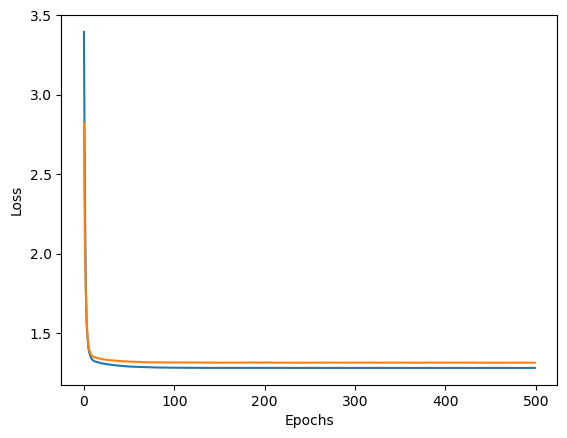

In [14]:
# plot mse test and mse valid
ax = sns.lineplot(x = range(0,500), y = mse_history)
sns.lineplot(x = range(0,500), y = mse_valid_history, ax = ax)
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')

2. Please write a Ridge regression model and use mini-batch gradient descent to train the model on this dataset for predicting the count of total rental bikes including both casual and registered. You do not need to use all the features. Use K-fold cross validation and report the mean squared error (MSE) on the test data. You need to write down every step in your experiment.

***Approch***

Our model is $$y(w,X) = w_0 + w_1X_1 + .. + w_mX_m$$

For this problem we fit the linear model by trying to minimize the cost function via gradient descent. We utilize mini batch gradient descent. Our cost function is the mean squared error of the form $$\frac{1}{m}[\sum_{i=1}^{m}(y(w,X) - y)^2+\alpha\sum_{k=1}^{n}w_k^2]$$ where $X$ is the randomly chosen mini batch of size $m$.
Our mini batch gradient is obtained by calculating the 1st derivative of the cost function and is of the form $$\nabla = \frac{2}{m}[{X^T}(Xw - y) + \alpha w]$$ .
Once we obtain the gradient, we update the weights using $$w = w - \eta.\nabla$$ where $\eta$ is the learning rate.

***Data preparation steps***
1. Once we obtain the data, we split the data into a training and test sets.
3. Since linear regression can be sensitive to differing scales in data, we standardize the input columns by subtracting mean and dividing by standard deviation.
3. We also stack a column of 1's to the input data to account for the bias term $w_0$

***Model fitting and prediction***
1. We run multiple iterations(epochs) and in each iteration we use kfold cross validation with 7 folds. 
2. For each step in the kfold cross validation, 6 fold are taken as the training set and the last fold is used as validation. For each of these iterations, we process the entire training set. For each such processing step, we take a batch of samples from the training set, calculate the gradient and update the weights as outlined above for each batch. 
2. For each fold iteration we also calculate the overall training MSE and validation MSE. For each epoch we average the fold level errors. Finally we plot these training and validation losses, make predictions on the test set and calculate the test MSE as well.
3. We have chosen 2000 iterations as the total number of epochs for this experiment, but improvements can be made by choosing a higher epoch count and adding a suitable stopping criterion when the validation loss stops decreasing.


In [15]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bike_sharing = fetch_ucirepo(id=275) 
  
# data (as pandas dataframes) 
x = bike_sharing.data.features 
y = bike_sharing.data.targets 
  
# metadata 
print(bike_sharing.metadata) 
  
# variable information 
print(bike_sharing.variables) 

# dropping date column and one hot encoding categoricals (season, yr, mnth, hr, weekday, weathersit)
x = x.drop(['dteday', 'yr'], axis = 1)
x = pd.get_dummies(data = x, columns = ['season', 'mnth', 'hr', 'weekday', 'weathersit'])

{'uci_id': 275, 'name': 'Bike Sharing', 'repository_url': 'https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/275/data.csv', 'abstract': 'This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 17389, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['cnt'], 'index_col': ['instant'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5W894', 'creators': ['Hadi Fanaee-T'], 'intro_paper': {'title': 'Event labeling combining ensemble detectors and background knowledge', 'authors': 'Hadi Fanaee-T, João Gama', 'published_in': 'Progress in Artificial Intelli

In [16]:
# train test split
num_data = x.shape[0]
num_features = x.shape[1]
print(num_data,num_features)

# shuffling data
shuffled = np.random.permutation(num_data)

# calculate num of test samples
test_set = int(num_data * 0.2)

# split indices into test and train
test_indices = shuffled[:test_set]
train_indices = shuffled[test_set:]

# split the data
x_train = x.iloc[train_indices]
x_test = x.iloc[test_indices]
y_train = y.iloc[train_indices]
y_test = y.iloc[test_indices]

#standardize 
x_train_scaled, mean, sd = standardize(x_train) 
x_test_scaled = (x_test - mean) / sd

# add column of ones to x for intercept term
x_train_int = np.column_stack([np.ones(x_train_scaled.shape[0]), x_train_scaled])
x_test_int = np.column_stack([np.ones(x_test_scaled.shape[0]), x_test_scaled])

17379 57


In [17]:
# defining ridge function
def ridge(x,y,learning_rate = 0.0001, n_iter = 2000):
    # initializing parameter
    m,n = x.shape
    w = np.random.randn(n,1)
    y = y.reshape(-1,1)
    # Set some batch_size variable to mini batch size you want per iteration
    batch_size = 700 
    alpha = 0.0001
    # create some lists for overall training loss and validation loss
    training_loss = []
    valid_loss = []    

    for iter in range(n_iter):
        # create some lists to hold the losses for each fold loop
        fold_training_loss = []
        fold_val_loss = []
        # Create the KFold()
        kf = KFold(n_splits=7, shuffle = True, random_state = 777)

        for (training_index, validation_index) in kf.split(x):
            # Use the train index to get the training folds from the train_X and train_y data
            train_x_fold = x[training_index]
            train_y_fold = y[training_index]
            
            # Use the validation indices to get the validation data from the same train_X and train_y data
            valid_x_fold = x[validation_index]
            valid_y_fold = y[validation_index]

            # calculate batch_count
            batch_count = train_x_fold.shape[0]//batch_size + (0 if train_x_fold.shape[0]%batch_size == 0 else 1)

            for idx in range(batch_count):
                 # Get the batch X data from the train X data fold
                batch_x = train_x_fold[idx*batch_size: (idx + 1)*batch_size]

                # Get the batch Y data from the train Y data fold
                batch_y = train_y_fold[idx*batch_size: (idx + 1)*batch_size]

                # calculate your ridge gradient using the ridge forumula
                ridge_gradients = (2*batch_x.T.dot(batch_x.dot(w)-batch_y) + 2*np.dot(alpha,w))/batch_x.shape[0]

                # update theta
                w = w - learning_rate * ridge_gradients

            # calculate training loss and validation loss MSE for this batch and store it in the lists for fold level losses
            train_mse = np.mean((train_x_fold.dot(w) - train_y_fold) ** 2)
            fold_training_loss.append(train_mse)
            
            valid_mse = np.mean((valid_x_fold.dot(w) - valid_y_fold) ** 2)
            fold_val_loss.append(valid_mse)
    
        #calculate the training loss and validation loss for this iteration by averageing the training loss and validation loss from the folds level lists
        training_loss.append(np.average(fold_training_loss))
        valid_loss.append(np.average(fold_val_loss))  
         
        if iter%50 == 0: 
            print(f'epoch number: {iter}, t loss: {training_loss[-1]}, v loss: {valid_loss[-1]}' )
    return (w, training_loss, valid_loss)  

In [18]:
# Train the model using ridge 
theta_ridge, train_loss, val_loss = ridge(x_train_int, y_train.values)

epoch number: 0, t loss: 65720.83534913449, v loss: 65735.91173235992
epoch number: 50, t loss: 15861.193140932979, v loss: 15862.575650485176
epoch number: 100, t loss: 12363.454139273983, v loss: 12363.721119091713
epoch number: 150, t loss: 12046.63521987545, v loss: 12046.806360729408
epoch number: 200, t loss: 12009.115901498253, v loss: 12009.282130026762
epoch number: 250, t loss: 12000.845562867455, v loss: 12001.013732057092
epoch number: 300, t loss: 11997.299220674262, v loss: 11997.468586794837
epoch number: 350, t loss: 11995.23929547463, v loss: 11995.409053738273
epoch number: 400, t loss: 11993.903134451613, v loss: 11994.072873807207
epoch number: 450, t loss: 11992.9840221404, v loss: 11993.153566845474
epoch number: 500, t loss: 11992.323606359178, v loss: 11992.492895105102
epoch number: 550, t loss: 11991.831286178853, v loss: 11992.00030998341
epoch number: 600, t loss: 11991.452164098597, v loss: 11991.620936674886
epoch number: 650, t loss: 11991.15158143755, v 

Text(0, 0.5, 'Loss')

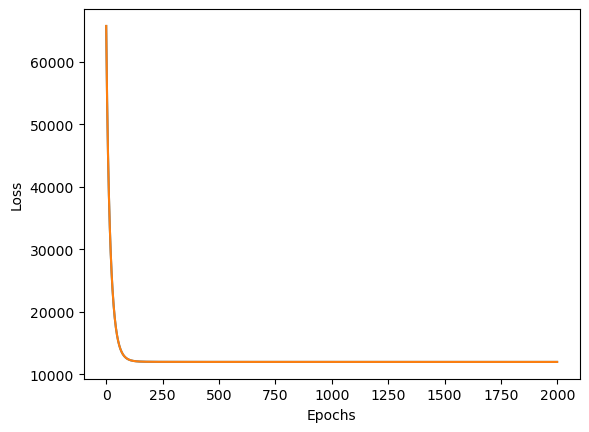

In [19]:
# plot training loss vs validation loss 
ax = sns.lineplot(x = range(0,2000), y = train_loss)
sns.lineplot(x = range(0,2000), y = val_loss, ax = ax)
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')